In [1]:
from vnstock import *
from function import *

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [2]:
ticket = ['CII','CTD','CTG','DHG','DPM','EIB','FPT','GAS','GMD','HDB','HPG','MBB','MSN','MWG','NVL','PNJ','REE','ROS','SAB','SBT','SSI','STB','TCB','VCB','VHM','VIC','VJC','VNM','VPB','VRE']

frame = []
for i in ticket:
    a = stock_historical_data(symbol=i, 
                            start_date="2013-01-01", 
                            end_date='2023-02-11')    
    a["ticker"] = i
    frame.append(a)

close= pd.concat(frame).pivot_table(values="Close", columns="ticker", index="TradingDate")

### Markowitz model

In [3]:
w = marko_weights(close)

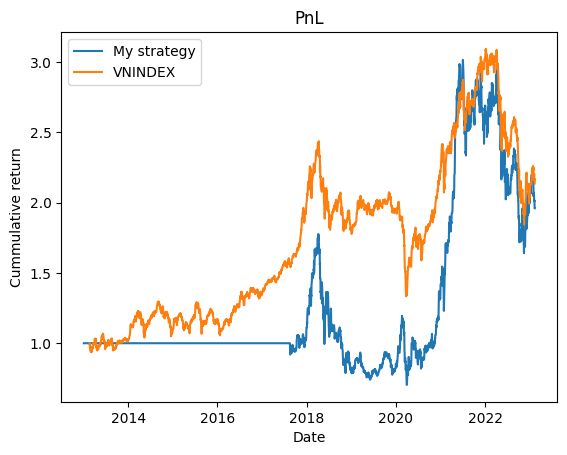

In [4]:
a = Simresult(w,returns=close.pct_change())
a.plot_pnl()

m=get_index_series(index_code='VNINDEX', time_range='TenYears')
m["i"]=pd.to_datetime(m["tradingDate"])
plt.plot(m["i"],np.cumprod(m["indexValue"].pct_change()+1), label="VNINDEX")
plt.legend()

### Alpha = ts_delta(close,5); weights

In [5]:
lag = 5
close_t5=close-close.shift(lag)

In [6]:
returns = close.pct_change()
w  = weights(close_t5)

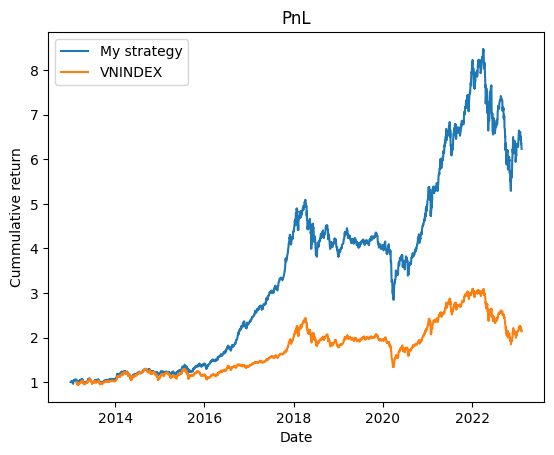

In [7]:
kq=Simresult(weights=w,returns=returns)
kq.plot_pnl()

m=get_index_series(index_code='VNINDEX', time_range='TenYears')
m["i"]=pd.to_datetime(m["tradingDate"])
plt.plot(m["i"],np.cumprod(m["indexValue"].pct_change()+1), label="VNINDEX")
plt.legend()

In [8]:
kq.get_summary()

,Return,Sharpe,Turnover,Fitness
0,0.200725,1.078315,0.233258,1.000294


### Alpha = ts_delta(close,5); weight1

In [9]:
returns = close.pct_change()
w  = weights1(close_t5)

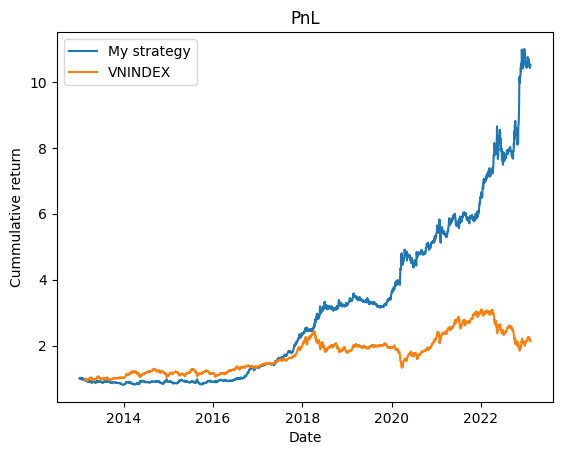

In [10]:
kq=Simresult(weights=w,returns=returns)
kq.plot_pnl()

m=get_index_series(index_code='VNINDEX', time_range='TenYears')
m["i"]=pd.to_datetime(m["tradingDate"])
plt.plot(m["i"],np.cumprod(m["indexValue"].pct_change()+1), label="VNINDEX")
plt.legend()

In [11]:
kq.get_summary()

,Return,Sharpe,Turnover,Fitness
0,0.265213,1.540678,0.592143,1.031088


### Alpha = rank(ts_delta(close,5)); weight

In [12]:
lag = 5
close_t5=close-close.shift(lag)
ra_t5 = (close_t5.rank(axis=1).div(close_t5.rank(axis=1).sum(axis=1),axis=0))
w =weights(ra_t5)

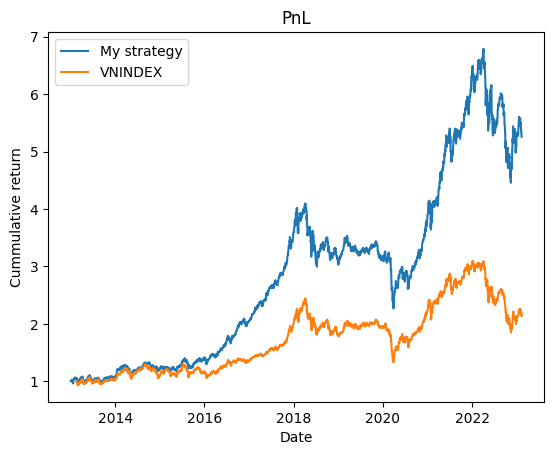

In [13]:
a = Simresult(w,returns)
a.plot_pnl()

m=get_index_series(index_code='VNINDEX', time_range='TenYears')
m["i"]=pd.to_datetime(m["tradingDate"])
plt.plot(m["i"],np.cumprod(m["indexValue"].pct_change()+1), label="VNINDEX")
plt.legend()

In [125]:
a.get_summary()

,Return,Sharpe,Turnover,Fitness
0,0.180427,0.981779,0.303456,0.757035
